# Some Important Points: 🔋 


1.   V(max) = 4.2 volt
2.   V(min) = 2.8/2.7 Volt
3.   Nominal Charge capacity = 2500 mA/2.5Ah 
4.   SOC = Normal Capacity at that point/Nominal capacity
5.   Nominal Capacity - ammount of charged deliverd by fully charge batter, when it is fresh. OR **we can say Total capacity of battery.**
6.   SOH = Maximum of SOC at one cycle.
7.   we can find SOH by making set of loops in dataset and then find max(SOC).


In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cols = ['Time(s)', 'Potential(V)','Current(A)','Charge(C)','A/Hour']
df = pd.read_csv("experiment.csv")
df

,Time/sec,Potential/V,Current/A,Charge/C,Capacity/Ah,Nominal_Capacity/Ah
0,0.4,3.54,1.25,0.00,0.00,2.5
1,1.0,3.54,1.25,0.95,0.00,2.5
2,2.0,3.54,1.25,2.28,0.00,2.5
3,3.0,3.55,1.25,3.46,0.00,2.5
4,4.0,3.55,1.25,4.64,0.00,2.5
...,...,...,...,...,...,...
242880,249963.2,4.20,0.20,8450.00,2.35,2.5
242881,249964.2,4.20,0.20,8450.00,2.35,2.5
242882,249965.2,4.20,0.20,8450.00,2.35,2.5
242883,249966.2,4.20,0.20,8450.00,2.35,2.5


In [3]:
df.shape   # checking the shape of dataset

(242885, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time/sec             242885 non-null  float64
 1   Potential/V          242885 non-null  float64
 2   Current/A            242885 non-null  float64
 3   Charge/C             242885 non-null  float64
 4   Capacity/Ah          242885 non-null  float64
 5   Nominal_Capacity/Ah  242885 non-null  float64
dtypes: float64(6)
memory usage: 11.1 MB


In [6]:
df.isnull().count()

Time/sec               242885
Potential/V            242885
Current/A              242885
Charge/C               242885
Capacity/Ah            242885
Nominal_Capacity/Ah    242885
dtype: int64

In [7]:
display(df.iloc[1])

Time/sec               1.00
Potential/V            3.54
Current/A              1.25
Charge/C               0.95
Capacity/Ah            0.00
Nominal_Capacity/Ah    2.50
Name: 1, dtype: float64

In [8]:
df.insert(loc = 6,column ='SOC',value=df['Capacity/Ah']/df['Nominal_Capacity/Ah'])

In [25]:
df = df.insert(loc = 7,column ='SOC(%)',value=df['SOC']*100)

In [40]:
df

,Time/sec,Potential/V,Current/A,Charge/C,Capacity/Ah,Nominal_Capacity/Ah,SOC,SOC(%)
0,0.4,3.54,1.25,0.00,0.00,2.5,0.00,0.0
1,1.0,3.54,1.25,0.95,0.00,2.5,0.00,0.0
2,2.0,3.54,1.25,2.28,0.00,2.5,0.00,0.0
3,3.0,3.55,1.25,3.46,0.00,2.5,0.00,0.0
4,4.0,3.55,1.25,4.64,0.00,2.5,0.00,0.0
...,...,...,...,...,...,...,...,...
242880,249963.2,4.20,0.20,8450.00,2.35,2.5,0.94,94.0
242881,249964.2,4.20,0.20,8450.00,2.35,2.5,0.94,94.0
242882,249965.2,4.20,0.20,8450.00,2.35,2.5,0.94,94.0
242883,249966.2,4.20,0.20,8450.00,2.35,2.5,0.94,94.0


In [39]:
print(f"The SOC of battery is {df.iloc[4444][7]}% \nFor the values of: \n{df.iloc[4444]}")

The SOC of battery is 61.6% 
For the values of: 
Time/sec               4444.000
Potential/V               4.070
Current/A                 1.250
Charge/C               5560.000
Capacity/Ah               1.540
Nominal_Capacity/Ah       2.500
SOC                       0.616
SOC(%)                   61.600
Name: 4444, dtype: float64


## Function for getting the SOC(state of Charge) %

In [34]:
def show_soc(row, soc_column):
  print(f"The SOC of battery is {df.iloc[row][soc_column]}% \nFor the values of: \n{df.iloc[row]}")

In [35]:
show_soc(5675,7)

The SOC of battery is 78.0% 
For the values of: 
Time/sec               5675.00
Potential/V               4.20
Current/A                 0.93
Charge/C               7030.00
Capacity/Ah               1.95
Nominal_Capacity/Ah       2.50
SOC                       0.78
SOC(%)                   78.00
Name: 5675, dtype: float64


In [37]:
show_soc(7898,7)

The SOC of battery is 89.60000000000001% 
For the values of: 
Time/sec               7898.000
Potential/V               4.200
Current/A                 0.200
Charge/C               8050.000
Capacity/Ah               2.240
Nominal_Capacity/Ah       2.500
SOC                       0.896
SOC(%)                   89.600
Name: 7898, dtype: float64


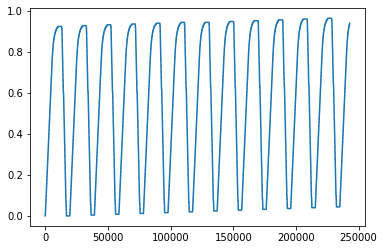

In [53]:
# SOC plot
plt.plot(df["SOC"], linestyle='solid')

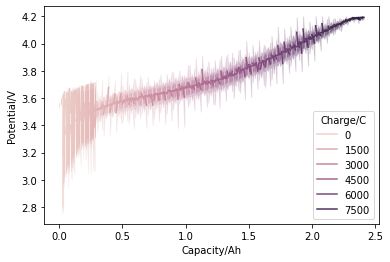

In [44]:
sns.lineplot(x="Capacity/Ah", y="Potential/V",
             hue="Charge/C",
             data=df)

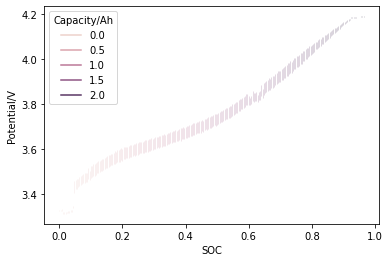

In [47]:
sns.lineplot(x="SOC", y="Potential/V",
             hue="Capacity/Ah",
             data=df)